## Import packages ##

In [1]:
import numpy as np
import seaborn as sns
sns.set(context='talk', style='ticks')
import matplotlib.pyplot as plt
import pandas as pd

import lab3
from lab3.experiment.group import ExperimentGroup
from lab3.analysis.spatial.abstract_spatial_tuning import SpatialTuning
from lab3.filters.time_filters import IsRunning

## Define analysis ##

In [2]:
SpatialTuning.constructor_ids

['nbins', 'bins', 'sigma']

In [3]:
spatial_tuning_strategy = SpatialTuning(nbins=100)

In [4]:
spatial_tuning_strategy

position,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99


## Build experiment group ##

In [5]:
trial_ids = [27738] 

grp = ExperimentGroup.from_trial_ids(trial_ids)

In [6]:
cohort = grp.to_cohort()
cohort

,
Mouse,ImagingExperiment
aac22,27738


## Apply analysis to dataset ##

Analysis objects are versatile: the same analysis can be run on different signal types and sets of ROIs. These are specified with the `signal_spec` dictionary at runtime 

In [7]:
signal_spec = {
    'signal_type': 'dfof',
    'label': 'PYR'
}

It is conventional to compute spatial tuning only on running epochs. We can accomplish this easily using a filter (see the Filters tutorials for more information)

In [8]:
is_running = IsRunning()

In [9]:
result = cohort.apply(spatial_tuning_strategy, signal_spec=signal_spec)#, time_filter=is_running)

/home/zhenrui/code/lab3/lab3/core/helpers.py:85: UserWarning: The Analysis `SpatialTuning` is not type-annotated (consider adding annotations to allow type-checking)
  warnings.warn(f"The Analysis `{name}` is not type-annotated "
/home/zhenrui/anaconda3/envs/lab3/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '0x2a6f'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


In [10]:
result.dropna()

position                                             0.00      0.01      0.02  \
Mouse ImagingExperiment LapEvent roi_label                                      
aac22 27738             1        0000-0010-0095  0.059784  0.053854  0.044575   
                                 0000-0010-0166  0.100209  0.094788  0.092716   
                                 0000-0010-0377  0.051664  0.052700  0.049776   
                                 0000-0010-0453  0.123128  0.111683  0.101970   
                                 0000-0011-0122  0.078775  0.083662  0.086199   
...                                                   ...       ...       ...   
                        47       0000-0502-0109 -4.917319 -4.605493 -4.262207   
                                 0000-0502-0247  0.154679  0.148708  0.164210   
                                 0000-0503-0016 -2.545987 -2.513363 -2.463329   
                                 0000-0503-0159  0.621384  0.614707  0.592620   
                                 0000-0503-0188  0.070694  0.077308  0.089936   

position                                             0.03      0.04      0.05  \
Mouse ImagingExperiment LapEvent roi_label                                      
aac22 27738             1        0000-0010-0095  0.033580  0.022986  0.014601   
                                 0000-0010-0166  0.094510  0.099507  0.106268   
                                 0000-0010-0377  0.043282  0.034952  0.027152   
                                 0000-0010-0453  0.095146  0.091658  0.091196   
                                 0000-0011-0122  0.083771  0.074640  0.059232   
...                                                   ...       ...       ...   
                        47       0000-0502-0109 -3.915661 -3.589963 -3.300553   
                                 0000-0502-0247  0.194991  0.228401  0.251039   
                                 0000-0503-0016 -2.400828 -2.329174 -2.248415   
                                 0000-0503-0159  0.557330  0.516232  0.479731   
                                 0000-0503-0188  0.105995  0.122867  0.138274   

position                                             0.06      0.07      0.08  \
Mouse ImagingExperiment LapEvent roi_label                                      
aac22 27738             1        0000-0010-0095  0.009060  0.005632  0.002840   
                                 0000-0010-0166  0.113077  0.118288  0.120531   
                                 0000-0010-0377  0.021872  0.019876  0.020627   
                                 0000-0010-0453  0.092768  0.094870  0.095833   
                                 0000-0011-0122  0.040262  0.021888  0.008245   
...                                                   ...       ...       ...   
                        47       0000-0502-0109 -3.051500 -2.836571 -2.645194   
                                 0000-0502-0247  0.253757  0.233946  0.195085   
                                 0000-0503-0016 -2.156639 -2.052943 -1.941023   
                                 0000-0503-0159  0.457411  0.454502  0.470148   
                                 0000-0503-0188  0.150109  0.156475  0.156129   

position                                             0.09  ...      0.90  \
Mouse ImagingExperiment LapEvent roi_label                 ...             
aac22 27738             1        0000-0010-0095 -0.000412  ... -0.013148   
                                 0000-0010-0166  0.118850  ...  0.065035   
                                 0000-0010-0377  0.022867  ...  0.069264   
                                 0000-0010-0453  0.094319  ...  0.131135   
                                 0000-0011-0122  0.002166  ...  0.024144   
...                                                   ...  ...       ...   
                        47       0000-0502-0109 -2.471839  ... -5.550968   
                                 0000-0502-0247  0.144905  ...  0.156672   
                                 0000-0503-0016 -1.831136  ... -3.205236   
  

In [11]:
# Compute mean over laps
mean_result = result.groupby(["Mouse", "ImagingExperiment", "roi_label"]).agg("mean")

In [12]:
# Peak normalize and sort
tuning_curves = mean_result.divide(mean_result.max(axis=1), axis=0)
order = tuning_curves.apply(np.argmax, axis=1)

## Plot analyzed data ##

Text(0, 0.5, 'sorted ROI #')

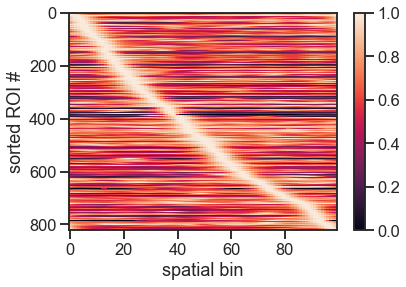

In [13]:
fig, ax = plt.subplots()

im = ax.imshow(tuning_curves.iloc[order.argsort()].dropna(), aspect='auto', vmin=0, vmax=1)
fig.colorbar(im)

ax.set_xlabel("spatial bin")
ax.set_ylabel("sorted ROI #")

## Identify place cells

In [14]:
from lab3.analysis.spatial.abstract_place_fields import PlaceFields

In [15]:
PlaceFields?

Init signature: PlaceFields(*args, **kwargs)
Docstring:      Abstract base class for designing analyses.
Source:        
class PlaceFields(SignalAnalysis):
    #name = 'PlaceFields'
    constructor_ids = ['num_bins', 'num_shuffles', 
                       'pval_threshold', 'min_trials_active', 'sigma']
    def to_columns(self):
        return pd.Index(['field_start', 'field_stop'])
    
    def __init__(self, num_shuffles=100, num_bins=100, pval_threshold=0.01, 
                 min_trials_active=3, sigma=3, **kwargs):
        """A shuffle-based place field identification algorithm. For each cell, 
        we draw surrogate tuning curves from a null distribution of shuffled
        signals. Locations where the true tuning curve exceeds some percentile 
        (default: 99th) of the shuffle distribution are identified as (statistically 
        significant) place fields.

        NB: Since this is a randomized (shuffle-based) algorithm, different runs may return 
        slightly diff

In [16]:
place_fields_strategy = PlaceFields()

In [17]:
pfs = cohort.apply(place_fields_strategy, signal_spec=signal_spec, time_filter=IsRunning())

/home/zhenrui/code/lab3/lab3/core/helpers.py:85: UserWarning: The Analysis `PlaceFields` is not type-annotated (consider adding annotations to allow type-checking)
  warnings.warn(f"The Analysis `{name}` is not type-annotated "
/home/zhenrui/anaconda3/envs/lab3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/zhenrui/anaconda3/envs/lab3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/zhenrui/anaconda3/envs/lab3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supp

In [18]:
pfs

field_start  field_stop
Mouse ImagingExperiment roi_label      field_count                         
aac22 27738             0000-0010-0095 0                     22          29
                                       1                     92          95
                        0000-0010-0377 0                     21          34
                        0000-0011-0122 0                      5           6
                        0000-0012-0147 0                     39          68
...                                                         ...         ...
                        0000-0498-0320 1                     58          74
                        0000-0501-0127 0                     68          69
                        0000-0502-0247 0                     44          49
                        0000-0503-0016 0                     38          41
                        0000-0503-0188 0                     39          41

[869 rows x 2 columns]

In [19]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

roi_labels = result.level['roi_label'].unique()

def visualize_place_fields(i):
    fig, (pf_ax, heatmap_ax) = plt.subplots(2,1,figsize=(10,6), sharex=True, 
                                            gridspec_kw={"height_ratios": [0.2,0.8]})
    df = result.level(roi_label=roi_labels[i])
    single_cell_pfs = pfs.level(roi_label=roi_labels[i])
    
    for _, field in single_cell_pfs.groupby("field_count"):
        default_field = np.zeros(100)
        default_field[field.field_start[0]:field.field_stop[0]] = 1
        pf_ax.plot(default_field)
        
    sns.despine(ax=pf_ax)
    pf_ax.set_title(roi_labels[i])
    
    heatmap_ax.imshow(df, aspect='auto')
    
    heatmap_ax.set_xlabel("place bin")
    heatmap_ax.set_ylabel("lap #")
    
    #return fig
    
_ = interact(visualize_place_fields, i=(0, len(roi_labels)-1))

interactive(children=(IntSlider(value=411, description='i', max=822), Output()), _dom_classes=('widget-interac…

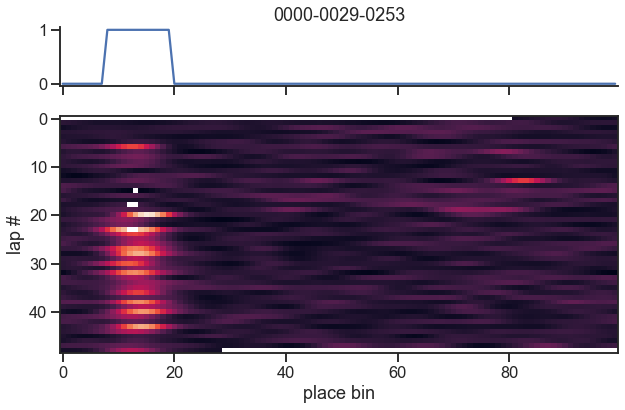

In [20]:
# If that doesn't work, you can interact manually
# CHANGE i
visualize_place_fields(i=36)

## Plot sorted heatmap

In [21]:
tuned_cells = pfs.level['roi_label'].unique()
untuned_cells = tuning_curves.level['roi_label'].unique().difference(tuned_cells)

In [22]:
tuned = tuning_curves.reindex(tuned_cells, level='roi_label')
#tuned -= tuned.min()

untuned = tuning_curves.reindex(untuned_cells, level='roi_label')
#untuned -= untuned.min()

tuned = tuned.divide(tuned.max(axis=1), axis=0)
untuned = untuned.divide(untuned.max(axis=1), axis=0)

In [23]:
from scipy.stats import circmean
centroids = pfs.apply(circmean, high=100, axis=1).to_frame("centroid")
centroids = centroids.level(field_count=0)
centroids = centroids.reindex(tuned.level['roi_label'], level='roi_label')

Text(0, 0.5, 'sorted ROI #')

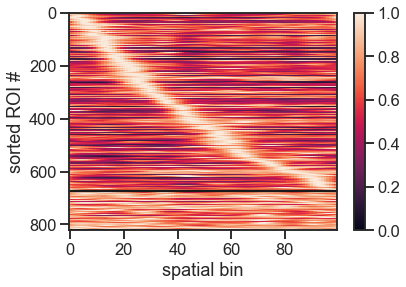

In [24]:
fig, ax = plt.subplots()

sorted_tuned = tuned.iloc[centroids.centroid.argsort()].dropna()
all_tcs = pd.concat([sorted_tuned, untuned])

im = ax.imshow(all_tcs, aspect='auto', vmin=0, vmax=1)

ax.axhline(len(sorted_tuned), c='k')

fig.colorbar(im)

ax.set_xlabel("spatial bin")
ax.set_ylabel("sorted ROI #")